# West Nile Virus Prediction Project

## Part 1: Data Wrangling

To start off, we make our necessary imports and load the three datasets, ```train```, ```test```, and ```weather```, into dataframes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, cos, sin, asin, sqrt

train = pd.read_csv('../input/train.csv')

test = pd.read_csv('../input/test.csv')

weather = pd.read_csv('../input/weather.csv')

In [2]:
train

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10501,2013-09-26,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,51,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.763733,-87.742302,8,6,1
10502,2013-09-26,"5800 North Ridge Avenue, Chicago, IL 60660, USA",CULEX PIPIENS/RESTUANS,58,N RIDGE AVE,T231,"5800 N RIDGE AVE, Chicago, IL",41.987280,-87.666066,8,5,0
10503,2013-09-26,"1700 North Ashland Avenue, Chicago, IL 60622, USA",CULEX PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,"1700 N ASHLAND AVE, Chicago, IL",41.912563,-87.668055,9,1,0
10504,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,5,0


In [3]:
test

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9
...,...,...,...,...,...,...,...,...,...,...,...
116288,116289,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",CULEX SALINARIUS,21,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.633590,8
116289,116290,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",CULEX TERRITANS,21,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.633590,8
116290,116291,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",CULEX TARSALIS,21,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.633590,8
116291,116292,2014-10-02,"2100 North Cannon Drive, Chicago, IL 60614, USA",UNSPECIFIED CULEX,21,N CANNON DR,T054C,"2100 N CANNON DR, Chicago, IL",41.925652,-87.633590,8


In [4]:
weather

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,45,M,34,42,20,0,...,,M,M,M,0.00,29.42,30.07,8.5,29,9.0
2940,1,2014-10-30,51,32,42,-4,34,40,23,0,...,,0,M,0.0,0.00,29.34,30.09,5.1,24,5.5
2941,2,2014-10-30,53,37,45,M,35,42,20,0,...,RA,M,M,M,T,29.41,30.10,5.9,23,6.5
2942,1,2014-10-31,47,33,40,-6,25,33,25,0,...,RA SN,0,M,0.1,0.03,29.49,30.20,22.6,34,22.9


We need to first merge the ```train``` dataset with the ```weather``` dataset.  We will use ```weather``` on ```train``` to come up with a predictive model for whether West Nile Virus will be present in each of the mosquito traps.

We will merge on two columns: ```Date```, and a ```Station``` column.  ```Date``` will be matched for the trap reading and the weather information.  ```Station``` exists in ```weather``` as weather data was collected at one of two stations.  We will match each trap with a ```Station``` in ```train``` by using the ```Latitude``` and ```Longitude``` data to determine which of the two stations is closer to the trap.  We will then assign the closer station (1 or 2) to the particular trap data.

We are given the latitudes and longitudes of all traps and both stations, so we can calculate these distances with the **haversine** formula.  We define a function below that calculates the distance between two points.

In [5]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

"""
Here are the latitudes and longitudes of Station 1 and Station 2.
"""
S1_lat = 41.995
S1_lon = -87.933
S2_lat = 41.786
S2_lon = -87.752



Then, we can finally merge the two datasets on ```Date``` and ```Station```.

In [6]:
traincopy = train

trainlats = train["Latitude"]
trainlons = train["Longitude"]

traincopy["Distance to Station 1"] = list(map(lambda x, y: haversine(x, y, S1_lon, S1_lat), trainlons, trainlats))

traincopy["Distance to Station 2"] = list(map(lambda x, y: haversine(x, y, S2_lon, S2_lat), trainlons, trainlats))

conditions = [
    traincopy["Distance to Station 1"] < traincopy["Distance to Station 2"],
    traincopy["Distance to Station 2"] < traincopy["Distance to Station 1"]
]

choices = [1,2]

traincopy['Station'] = np.select(condlist=conditions, choicelist=choices)

twmerged = pd.merge(traincopy, weather, on=['Date','Station'], how='left')

#twmerged = train + weather merged


We verify below that there are no null values in the ```twmerged``` dataset.

In [7]:
twmerged.isnull().values.any()
#There are no NaN values in the merged dataset

False

Now, we can remove all duplicates from the ```twmerged``` data set.

In [22]:
twmerged.shape

(10506, 35)

In [46]:
train_final = twmerged.drop_duplicates()
train_final.shape

(9693, 35)

## Part 2: Exploratory Data Analysis

Below, the columns for ```train_final``` are listed:

In [71]:
print(train_final.columns)

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Distance to Station 1',
       'Distance to Station 2', 'Station', 'Tmax', 'Tmin', 'Tavg', 'Depart',
       'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum',
       'Depth', 'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')


Now, we can do some preliminary data exploration and visualization.

### Correlation Heatmap

First, we do a correlation heatmap on ```train_final```.  From here, we can take a look at any interesting correlations between all the numerical variables.

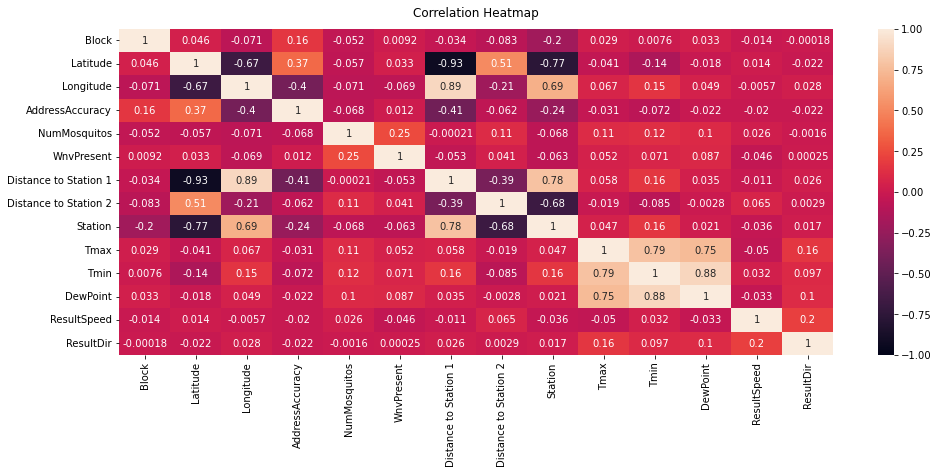

In [111]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(train_final.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Species

We want to investigate whether the type of mosquito caught in a trap has an impact on West Nile Virus presence.  Are certain mosquitos more likely to come with West Nile Virus?

In [92]:
speciestypes = train_final['Species'].unique()

Text(0.5, 1.0, 'WNV Presence vs. Species')

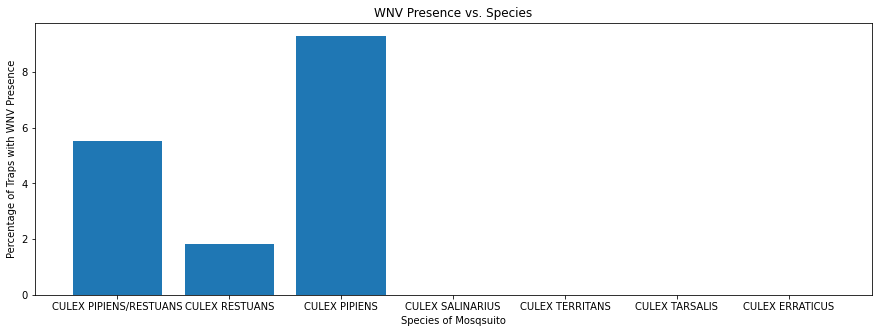

In [106]:
speciespercentages = [0] * len(speciestypes)
i = 0
for species in speciestypes:
    speciespercentages[i] = (1 - train_final[train_final['Species'] == species]['WnvPresent'].value_counts(normalize=True)[0])*100
    i += 1

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.bar(speciestypes, speciespercentages)
plt.xlabel('Species of Mosqsuito')
plt.ylabel('Percentage of Traps with WNV Presence')
plt.title('WNV Presence vs. Species')

As the above preliminary queries demonstrate, we only get WNV hits in *Culex Pipiens/Restuans*, *Culex Restuans*, and *Culex Pipiens* mosquito traps.  In all the other species in the ```train``` traps, there are zero WNV hits.

The sample size of the the other species is significantly smaller than the species where WNV was detected.  However, it is remarkable that out of about 300 total mosquito readings for the other species, there were no WNV detections.  So, we will be factoring in Species as a variable in West Nile Virus detection.

### Weather Variables: Temperature and Humidity

According to prior research, hot and dry conditions are more favorable to West Nile virus than cold and wet.  So we will do some preliminary research on this.

In [20]:
twmerged[['Tavg','DewPoint','StnPressure']]

,Tavg,DewPoint,StnPressure
0,74,58,29.39
1,74,58,29.39
2,74,58,29.39
3,74,58,29.39
4,74,58,29.39
...,...,...,...
10501,65,52,29.40
10502,63,52,29.34
10503,65,52,29.40
10504,63,52,29.34


### Number of Mosquitos

We want to know the impact of ```NumMosquitos``` on the presence of West Nile Virus in a trap.  We can preview this by taking a look at the percentage of traps with West Nile Virus presence for each number of mosquitos:

Text(0.5, 1.0, 'WNV Presence vs. Number of Mosquitos')

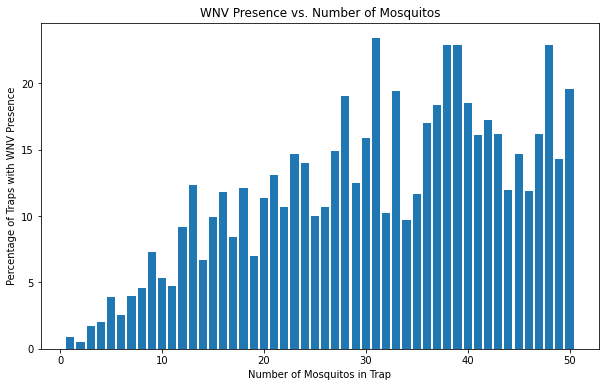

In [70]:
mosquitopercentages = [0] * 50
for i in range(50):
    mosquitopercentages[i] = train_final[train_final['NumMosquitos'] == i+1]['WnvPresent'].value_counts(normalize=True)[1] * 100

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)
plt.bar(range(1,51),mosquitopercentages)
plt.xlabel('Number of Mosquitos in Trap')
plt.ylabel('Percentage of Traps with WNV Presence')
plt.title('WNV Presence vs. Number of Mosquitos')


This graph tells us that there is a positive correlation between WNV presence and number of mosquitos.